In [1]:
#Importando Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#mesmo modelo usando scipy
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

/home/dataanalysis/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
#Pacote sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [4]:
#Importa o arquivo
df_salario = pd.read_csv('/media/sf_FormacaoCientistaDeDados/Portfolio/Stats_salary/Stats_Salary.csv',encoding='latin-1')

In [5]:
#Numero de registros e colunas
df_salario.shape

(651, 31)

In [6]:
#tipo de dados
df_salario.dtypes

Player              object
NBA_Country         object
NBA_DraftNumber      int64
Salary              object
Signed Using        object
Guaranteed          object
Pos                 object
Age                  int64
Tm                  object
G                    int64
MP                   int64
PER                float64
TS%                float64
3PAr               float64
FTr                float64
ORB%               float64
DRB%               float64
TRB%               float64
AST%               float64
STL%               float64
BLK%               float64
TOV%               float64
USG%               float64
OWS                float64
DWS                float64
WS                 float64
WS/48              float64
OBPM               float64
DBPM               float64
BPM                float64
VORP               float64
dtype: object

In [7]:
#valores nulos
df_salario.sum().isnull()

Player             False
NBA_Country        False
NBA_DraftNumber    False
Salary             False
Guaranteed         False
Pos                False
Age                False
Tm                 False
G                  False
MP                 False
PER                False
TS%                False
3PAr               False
FTr                False
ORB%               False
DRB%               False
TRB%               False
AST%               False
STL%               False
BLK%               False
TOV%               False
USG%               False
OWS                False
DWS                False
WS                 False
WS/48              False
OBPM               False
DBPM               False
BPM                False
VORP               False
dtype: bool

In [8]:
df_salario.head()

,Player,NBA_Country,NBA_DraftNumber,Salary,Signed Using,Guaranteed,Pos,Age,Tm,G,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Zhou Qi,China,43,"$815,615",MLE,"$815,615",C,22,HOU,16,...,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2
1,Zaza Pachulia,Georgia,42,"$3,477,600",NaN,"$3,477,600",C,33,GSW,66,...,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7
2,Zach Randolph,USA,19,"$12,307,692",Cap space,"$24,000,000",PF,36,SAC,59,...,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0
3,Zach LaVine,USA,13,"$3,202,217",1st Round Pick,"$3,202,217",SG,22,CHI,24,...,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1
4,Zach Collins,USA,10,"$3,057,240",1st Round Pick,"$6,686,160",C,20,POR,62,...,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2


In [9]:
#selecionando somente 1 linha para um jogador
player_distinct = df_salario.groupby('Player')[['Player','MP']].max()


In [10]:
#atualizando a lista de jogadores no dataframe
df_salario = df_salario.merge(player_distinct, left_on =['Player','MP'] ,right_on =['Player','MP'], how ='inner')

In [11]:
# Remove '$' e as  virgulas
df_salario['Salary'] = df_salario['Salary'].str.replace('$','')
df_salario['Salary'] = df_salario['Salary'].str.replace(',','')
df_salario['Guaranteed'] = df_salario['Guaranteed'].str.replace('$','')
df_salario['Guaranteed'] = df_salario['Guaranteed'].str.replace(',','')
#converte para float
df_salario['Salary'] = df_salario['Salary'].astype('float')
df_salario['Guaranteed'] = df_salario['Guaranteed'].astype('float')


In [12]:
#definindo novo tamanho de plot
plt.rcParams["figure.figsize"] = (15,10)

In [13]:
df_salario.describe()

,NBA_DraftNumber,Salary,Guaranteed,Age,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,531.000000,5.310000e+02,5.310000e+02,531.000000,531.000000,531.000000,531.00000,528.000000,528.000000,528.000000,...,528.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000
mean,31.821092,6.056650e+06,1.498136e+07,26.071563,46.892655,1067.429379,12.89774,0.531208,0.348536,0.259564,...,12.947727,18.520339,1.165160,1.083616,2.253672,0.076147,-1.475518,-0.605273,-2.080038,0.541243
std,21.876066,7.311108e+06,2.671069e+07,4.166189,26.176645,826.639558,8.96386,0.132576,0.233771,0.291431,...,6.415316,6.067417,1.834165,1.034597,2.638646,0.161344,5.317809,2.594495,6.078032,1.205512
min,1.000000,0.000000e+00,0.000000e+00,19.000000,1.000000,1.000000,-41.10000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-2.300000,0.000000,-1.200000,-1.063000,-39.000000,-20.000000,-59.000000,-1.300000
25%,12.000000,1.312611e+06,1.312611e+06,23.000000,20.000000,240.000000,9.30000,0.500000,0.173750,0.149000,...,9.700000,14.600000,0.000000,0.200000,0.200000,0.035500,-3.000000,-1.700000,-3.950000,-0.100000
50%,27.000000,2.500000e+06,4.095488e+06,25.000000,54.000000,1014.000000,12.90000,0.543000,0.357000,0.229500,...,12.400000,17.500000,0.500000,0.800000,1.400000,0.081000,-1.200000,-0.500000,-1.500000,0.100000
75%,59.000000,8.671161e+06,1.650000e+07,29.000000,70.000000,1753.000000,16.20000,0.580250,0.490500,0.319000,...,15.600000,21.900000,1.700000,1.700000,3.350000,0.122500,0.300000,0.900000,0.400000,0.800000
max,62.000000,3.468255e+07,2.011588e+08,41.000000,79.000000,2898.000000,134.10000,1.500000,1.000000,5.333000,...,66.700000,45.100000,11.400000,5.600000,15.000000,2.713000,68.700000,6.800000,54.400000,8.600000


In [14]:
#remove salario com valor zero
df_salario = df_salario[df_salario['Salary']>0]

In [15]:
#removendo colunas
remove_colunas = ['PER','TS%','OWS','WS','WS/48','OBPM','DBPM','BPM','VORP','DWS','Signed Using'] 
df_salario.drop(remove_colunas,inplace=True,axis=1)

In [16]:
df_salario.columns

Index(['Player', 'NBA_Country', 'NBA_DraftNumber', 'Salary', 'Guaranteed',
       'Pos', 'Age', 'Tm', 'G', 'MP', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%'],
      dtype='object')

In [17]:
#Correlação
cor = df_salario.corr()

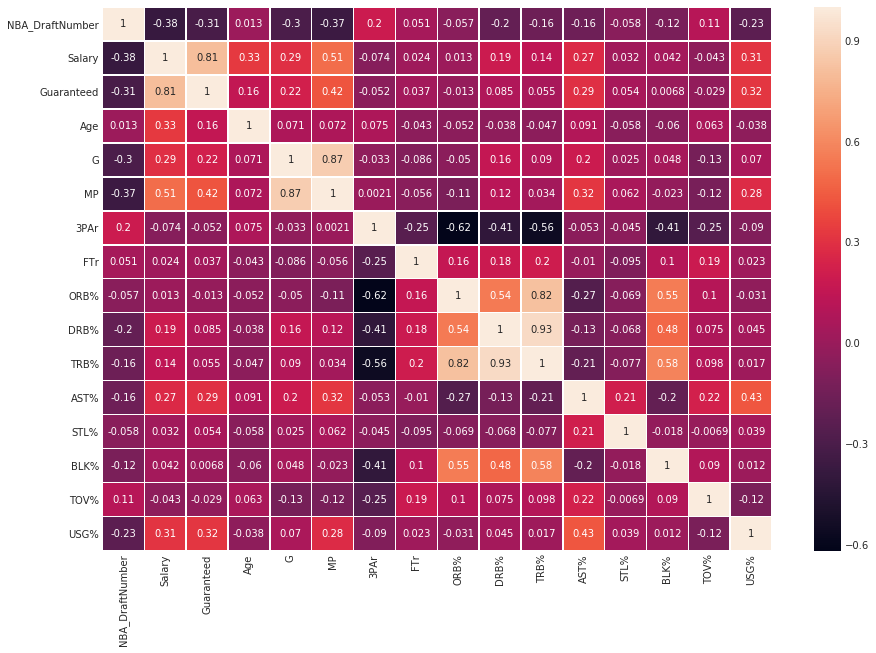

In [18]:
sns.set_style("whitegrid")
sns.heatmap(cor,annot = True,linewidths=.5)

In [19]:
cor[['Salary']].sort_values(by='Salary',ascending=False)

,Salary
Salary,1.000000
Guaranteed,0.805925
MP,0.505361
Age,0.334523
USG%,0.314245
G,0.294339
AST%,0.272845
DRB%,0.191169
TRB%,0.140842
BLK%,0.041752


## Escolha das Variaveis
### Com base no grau de correlação das variaveis com a variavel salario, iremos selecionar as seguintes informaçoes:
##### NBA_DraftNumber (Nesse caso a correlação é negativa.Um maior valor nesse campo reflete um menor salario)
##### Age
##### G
##### MP
##### USG%

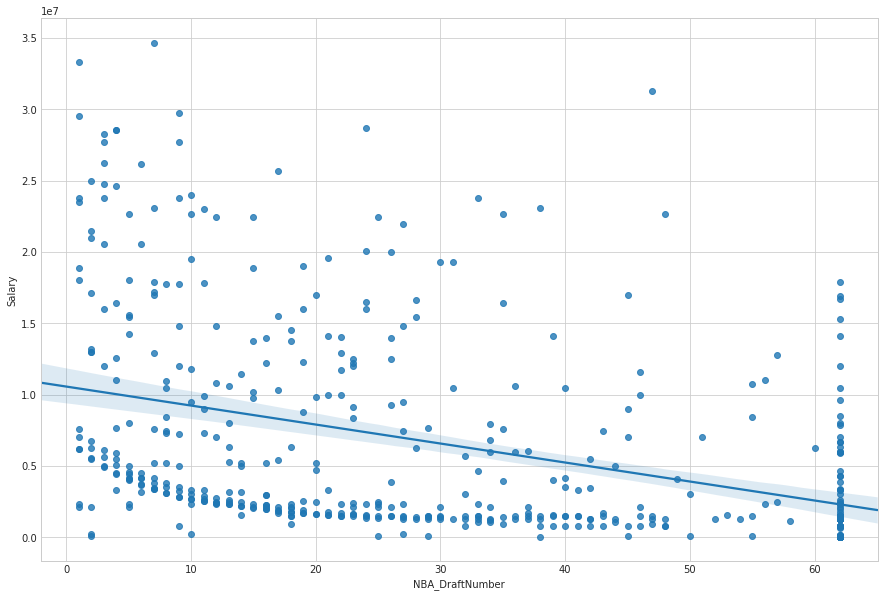

In [20]:
#Scatterplot
sns.regplot(x='NBA_DraftNumber',y='Salary',data=df_salario)
#df_salario.plot.scatter(x='NBA_DraftNumber',y='Salary',ylim=(500000,30000000))


In [21]:
df_salario[df_salario['NBA_DraftNumber']>=60].head()

,Player,NBA_Country,NBA_DraftNumber,Salary,Guaranteed,Pos,Age,Tm,G,MP,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%
5,Yogi Ferrell,USA,62,1312611.0,1312611.0,SG,24,DAL,79,2238,0.489,0.141,1.3,11.3,6.1,13.3,1.4,0.3,9.1,17.0
6,Xavier Silas,USA,62,74159.0,0.0,SG,30,BOS,2,7,0.667,0.000,15.9,15.4,15.7,0.0,7.2,0.0,0.0,19.2
7,Xavier Rathan-Mayes,Canada,62,46080.0,0.0,SG,23,MEM,5,118,0.333,0.214,0.0,5.0,2.5,23.2,2.6,2.4,19.3,21.7
11,Willie Reed,USA,62,1577230.0,1577230.0,C,27,TOT,42,428,0.017,0.455,9.1,21.7,15.5,3.6,1.0,4.3,11.6,16.6
14,Wesley Matthews,USA,62,17884176.0,17884176.0,SF,31,DAL,63,2131,0.577,0.145,1.4,9.1,5.2,12.3,1.8,0.7,10.1,17.6


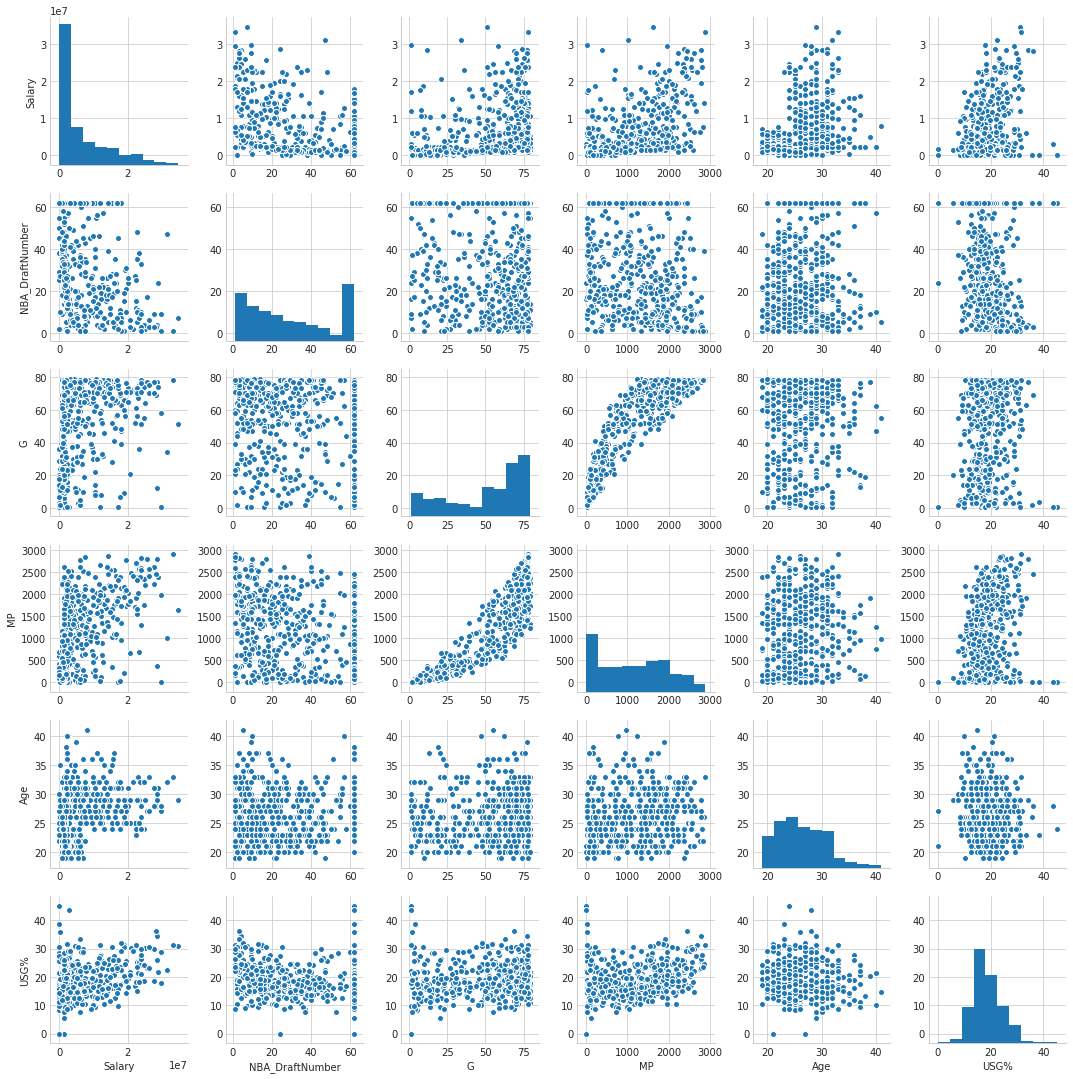

In [22]:
sns.pairplot(df_salario[['Salary','NBA_DraftNumber','G','MP','Age','USG%']])

In [23]:
#cria dataset com as variaveis desejadas
df_salario_modelo = df_salario[['Salary','NBA_DraftNumber','G','MP','Age','USG%']]

In [24]:
#Separando arquivo em treino e teste
X_train,X_test,y_train,y_test = train_test_split(df_salario_modelo.loc[:,df_salario_modelo.columns !='Salary'],df_salario_modelo.loc[:,'Salary'])

## Criando Primeiro Modelo com Linear Regression

In [25]:
X = sm.add_constant(X_train)
model= sm.OLS(y_train,X).fit()

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     62.83
Date:                Tue, 25 Dec 2018   Prob (F-statistic):           7.34e-47
Time:                        20:54:08   Log-Likelihood:                -6119.1
No. Observations:                 362   AIC:                         1.225e+04
Df Residuals:                     356   BIC:                         1.227e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -9.497e+06   2.36e+06     -4.018      0.000   -1.41e+07   -4.85e+06
NBA_DraftNumber -6.781e+04   1.45e+04     -4.689      0.000   -9.63e+04   -3.94e+04
G               -1.546e+05   2.58e+04     -5.983      0.000   -2.05e+05   -1.04e+05
MP               7577.0471    838.285      9.039      0.000    5928.433    9225.661
Age              5.694e+05    6.7e+04      8.495      0.000    4.38e+05    7.01e+05
USG%              1.14e+05   5.77e+04      1.975      0.049     492.150    2.27e+05
==============================================================================
Omnibus:                       51.134   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.020
Skew:                           0.854   Prob(JB):                     9.39e-19
Kurtosis:                       4.608   Cond. No.                     1.19e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Analise
### Vamos verificar o modelo gerado

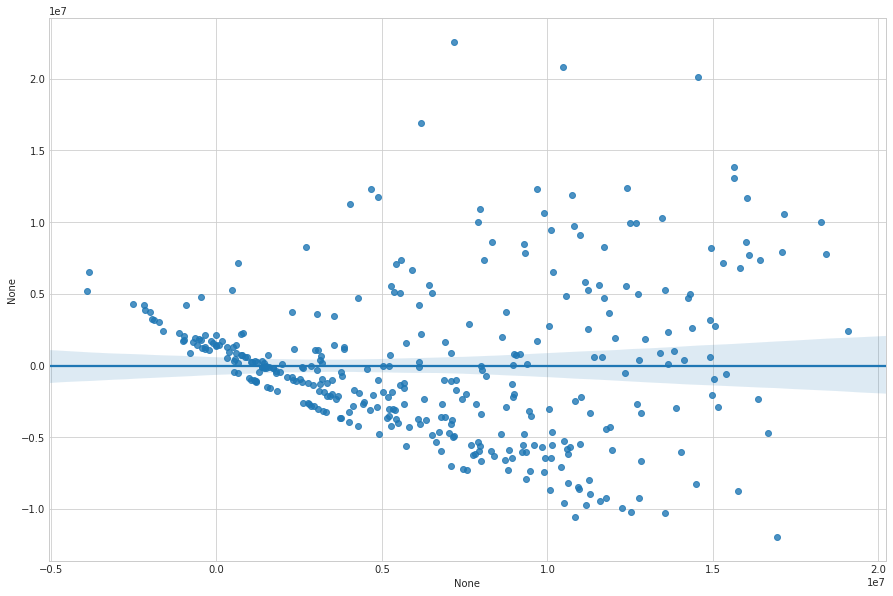

In [27]:
sns.regplot(x= model.fittedvalues,y=model.resid)

## 2- Modelo 
### Usando log y 

In [28]:
y_train_log=np.log(y_train)

In [29]:
X = sm.add_constant(X_train)
model_log = sm.OLS(y_train_log,X).fit()

In [30]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     76.37
Date:                Tue, 25 Dec 2018   Prob (F-statistic):           3.11e-54
Time:                        20:54:29   Log-Likelihood:                -519.48
No. Observations:                 362   AIC:                             1051.
Df Residuals:                     356   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              11.5520      0.453     25.528      0.000      10.662      12.442
NBA_DraftNumber    -0.0219      0.003     -7.904      0.000      -0.027      -0.016
G                   0.0062      0.005      1.246      0.213      -0.004       0.016
MP                  0.0006      0.000      3.966      0.000       0.000       0.001
Age                 0.1021      0.013      7.958      0.000       0.077       0.127
USG%                0.0166      0.011      1.501      0.134      -0.005       0.038
==============================================================================
Omnibus:                        9.159   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.568
Skew:                          -0.320   Prob(JB):                      0.00836
Kurtosis:                       3.475   Cond. No.                     1.19e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

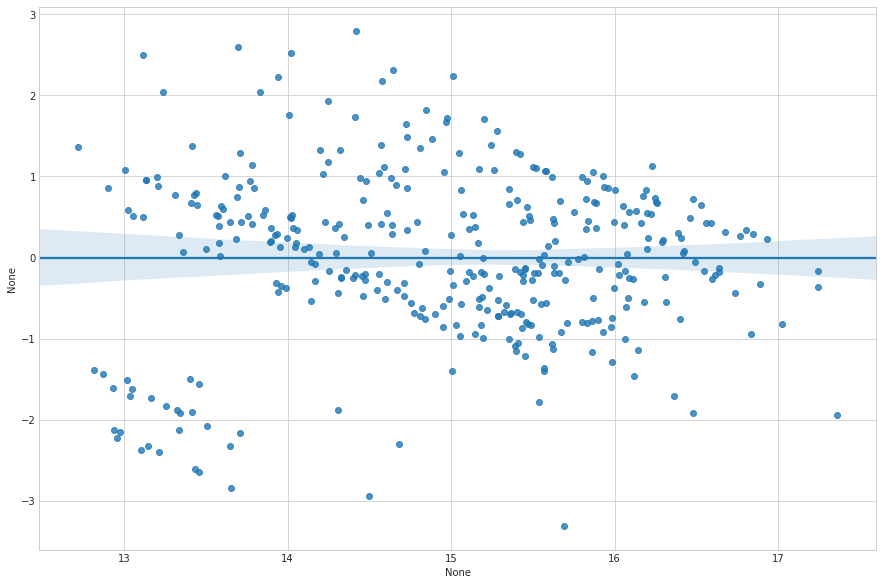

In [31]:
sns.regplot(x= model_log.fittedvalues,y=model_log.resid)

## 3- Modelo
### normalizando as variaveis

In [33]:
#normalizando
df_salario_log = df_salario[['Salary','NBA_DraftNumber','G','MP','Age','USG%']].copy()
df_salario_log['Age'] = np.log(df_salario_log['Age'])
df_salario_log['NBA_DraftNumber'] = np.log(df_salario_log['NBA_DraftNumber'])
df_salario_log['MP'] = np.log(df_salario_log['MP'])
df_salario_log['Salary'] = np.log(df_salario_log['Salary'])
df_salario_log['G'] = np.log(df_salario_log['G'])


In [34]:
#Separando arquivo em treino e teste
X_train,X_test,y_train,y_test = train_test_split(df_salario_log.loc[:,df_salario_log.columns !='Salary'],df_salario_log.loc[:,'Salary'])

In [35]:
X = sm.add_constant(X_train)
model_log = sm.OLS(y_train,X).fit()

In [36]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     72.49
Date:                Tue, 25 Dec 2018   Prob (F-statistic):           3.43e-52
Time:                        20:55:41   Log-Likelihood:                -540.44
No. Observations:                 362   AIC:                             1093.
Df Residuals:                     356   BIC:                             1116.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.4480      1.269      3.505      0.001       1.952       6.944
NBA_DraftNumber    -0.4688      0.059     -7.942      0.000      -0.585      -0.353
G                  -0.0739      0.192     -0.386      0.700      -0.451       0.303
MP                  0.5116      0.131      3.909      0.000       0.254       0.769
Age                 2.6560      0.372      7.138      0.000       1.924       3.388
USG%                0.0101      0.012      0.873      0.383      -0.013       0.033
==============================================================================
Omnibus:                        9.529   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               14.807
Skew:                          -0.157   Prob(JB):                     0.000609
Kurtosis:                       3.940   Cond. No.                         497.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3 Modelo - Polynomial

In [54]:
#cria dataset com as variaveis desejadas
df_salario_poly = df_salario_log[['Salary','NBA_DraftNumber','MP','Age']].copy()
#df_salario_poly['NBA_DraftNumber_2'] = df_salario_poly['NBA_DraftNumber'] ** 2
df_salario_poly['NBA_DraftNumber'] = df_salario_poly['NBA_DraftNumber'] ** 3


In [55]:
#Separando arquivo em treino e teste
X_train,X_test,y_train,y_test = train_test_split(df_salario_poly.loc[:,df_salario_poly.columns !='Salary'],df_salario_poly.loc[:,'Salary'])

In [56]:
X = sm.add_constant(X_train)
model_polymonial = sm.OLS(y_train,X).fit()

In [57]:
model_polymonial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     123.2
Date:                Tue, 25 Dec 2018   Prob (F-statistic):           7.74e-55
Time:                        21:03:31   Log-Likelihood:                -522.14
No. Observations:                 362   AIC:                             1052.
Df Residuals:                     358   BIC:                             1068.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.3439      1.138      3.818      0.000       2.107       6.581
NBA_DraftNumber    -0.0208      0.002     -8.618      0.000      -0.026      -0.016
MP                  0.4306      0.038     11.199      0.000       0.355       0.506
Age                 2.6231      0.344      7.617      0.000       1.946       3.300
==============================================================================
Omnibus:                       10.694   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               17.329
Skew:                          -0.171   Prob(JB):                     0.000173
Kurtosis:                       4.016   Cond. No.                         924.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

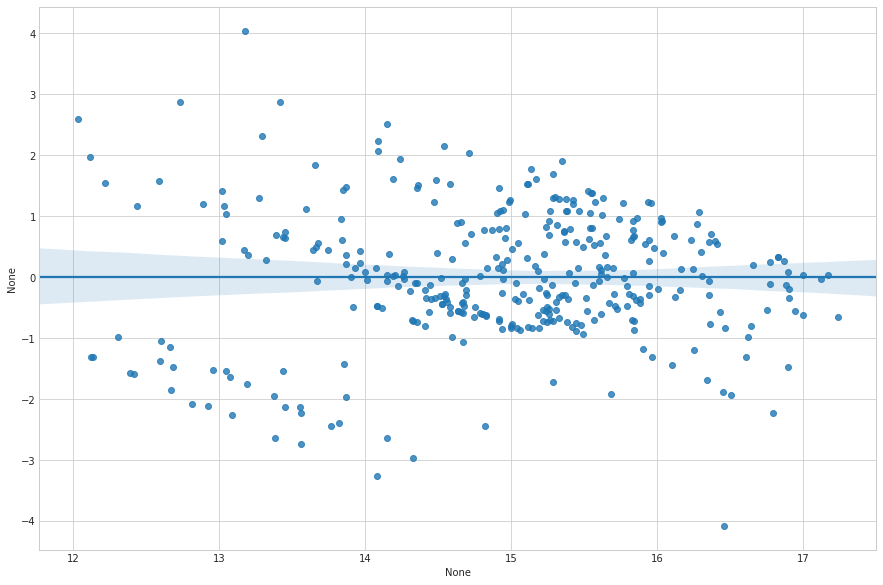

In [58]:
sns.regplot(x= model_log.fittedvalues,y=model_log.resid)

### Padronizando todas as variaveis

In [68]:
df_salario_standard = df_salario[['NBA_DraftNumber',
        'Age','G', 'MP', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%','Salary']].copy()
df_salario_standard['Salary'] = np.log(df_salario_standard['Salary'])

In [69]:
#Separando arquivo em treino e teste
X_train,X_test,y_train,y_test = train_test_split(df_salario_standard.loc[:,df_salario_standard.columns !='Salary'],df_salario_standard.loc[:,'Salary'])

In [70]:
std = StandardScaler()

In [89]:
df_salario_standard.dtypes

NBA_DraftNumber      int64
Age                  int64
G                    int64
MP                   int64
3PAr               float64
FTr                float64
ORB%               float64
DRB%               float64
TRB%               float64
AST%               float64
STL%               float64
BLK%               float64
TOV%               float64
USG%               float64
Salary             float64
dtype: object

In [ ]:
std.fit_transform(X_train.loc[:,X_train.columns =='3PAr'])
#std.transform(X_test.loc[:,X_test.columns =='3PAr'])